In [1]:
import pandas
import os
import numpy
directory = "./thauera-files/ThaueraPaper/"

In [2]:
from upsetplot import plot
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

## Upset plot

In [3]:
def get_union(sets):
    union = set()
    for s in sets:
        union = union.union(s)
    return union

def get_presence(all_elems, sets):
    presence = list()
    for e in all_elems:
        tmp = [e in s for s in sets]
        presence.append(tmp)
    return presence

def get_upset_data(sets,set_names=[]):
    if not set_names:
        set_names = [str(i) for i in numpy.arange(len(sets))]
    all_elems = get_union(sets)
    presence = get_presence(all_elems,sets)
    df = pandas.DataFrame(presence, columns = set_names)

    presence = pandas.DataFrame(presence,columns = set_names)
    presence.index = all_elems
    return df,df.groupby(set_names).size(), presence

In [4]:
polymerList = pandas.read_csv(directory+"polymerList.txt",index_col=0,header=None).index.to_list()

## Aerobic

In [5]:
Data = pandas.read_csv(directory+"aerobicLethalGenes.csv",header=None)
Data.columns = ["gene"] + polymerList
Data = Data.set_index("gene")

In [6]:
sets = []
for i in polymerList:
    sets.append(Data[Data[i]==1].index.to_list())

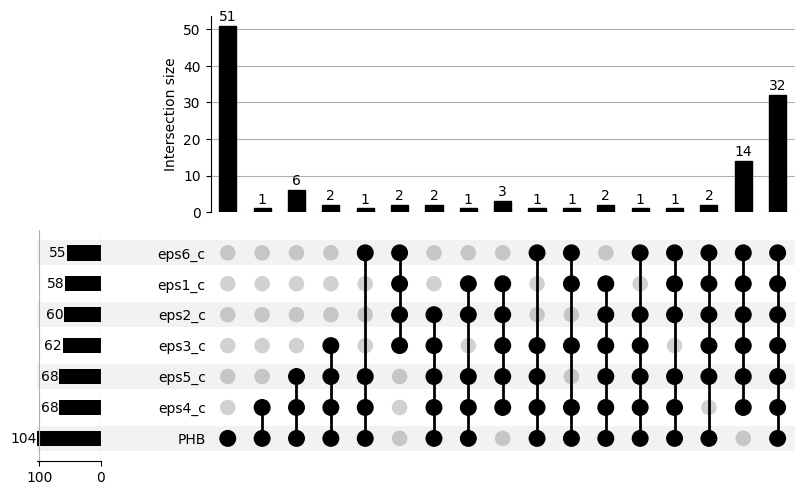

In [7]:
df,grouped,presence = get_upset_data(sets,set_names=polymerList)
UP=plot(grouped, orientation='horizontal', show_counts=True)
plt.savefig("./figures/gene-aerobic-upset.svg",format="SVG")

In [8]:
import itertools
flags = list(itertools.product([False, True], repeat=len(polymerList)))
for idx,i in enumerate(polymerList):
    t = [None]*len(polymerList)
    t[idx] = True
    flags.append(tuple(t))

In [9]:
dct = {}
groups = {}
group = 1
for flag in flags:
    slice = Data[polymerList].copy()
    for idx,f in enumerate(flag):
        slice = slice[slice[polymerList[idx]] == f]
    if slice.empty : continue
    groups[group] = flag
    dct[group] = slice.index.to_list()
    group += 1

## Anaerobic

In [10]:
Data = pandas.read_csv(directory+"anaerobicLethalGenes.csv",header=None)
Data.columns = ["gene"] + polymerList
Data = Data.set_index("gene")

In [11]:
sets = []
for i in polymerList:
    sets.append(Data[Data[i]==1].index.to_list())

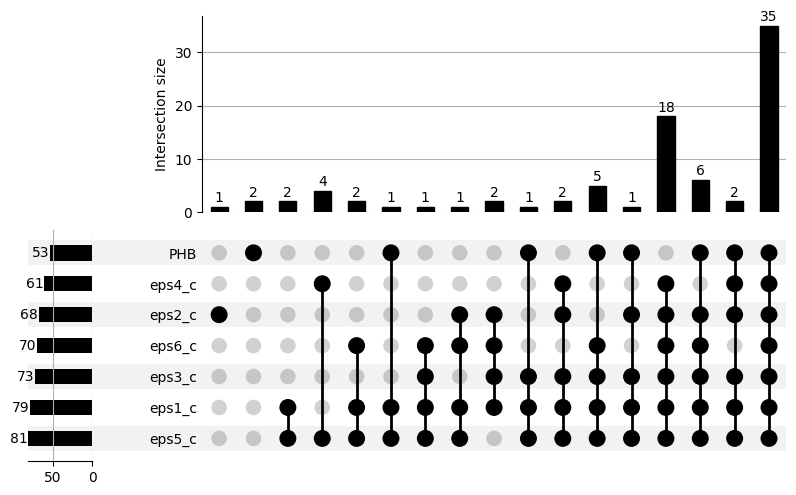

In [12]:
df,grouped,presence = get_upset_data(sets,set_names=polymerList)
UP=plot(grouped, orientation='horizontal', show_counts=True)
plt.savefig("./figures/gene-anaerobic-upset.svg",format="SVG")

In [13]:
import itertools
flags = list(itertools.product([False, True], repeat=len(polymerList)))
for idx,i in enumerate(polymerList):
    t = [None]*len(polymerList)
    t[idx] = True
    flags.append(tuple(t))

In [14]:
dct = {}
groups = {}
group = 1
for flag in flags:
    slice = Data[polymerList].copy()
    for idx,f in enumerate(flag):
        slice = slice[slice[polymerList[idx]] == f]
    if slice.empty : continue
    groups[group] = flag
    dct[group] = slice.index.to_list()
    group += 1